# HW4 Model-based Reinforcement Learning

In [1]:
import sys, os
import tensorflow as tf
import datetime as dt

os.environ['CUDA_VISIBLE_DEVICES'] = '1' # 0 is default GPU

print(tf.__version__)

from tensorflow.python.client import device_lib

local_device_protos = device_lib.list_local_devices()

print(local_device_protos)
print(tf.test.is_gpu_available())
print(tf.test.gpu_device_name())

1.14.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4438755247827707731
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9116851241
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8542642753863335409
physical_device_desc: "device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:68:00.0, compute capability: 7.5"
]
True
/device:GPU:0


In [2]:
# main.py

import os
import argparse
import time
import numpy as np

from half_cheetah_env import HalfCheetahEnv
from logger import logger, LoggerClass
from model_based_rl import ModelBasedRL
from model_based_rl import logger as model_logger
from collections import defaultdict

def run_mbrl() :
    parser = argparse.ArgumentParser()
    parser.add_argument('question', type=str, choices=('q1, q2, q3'))
    parser.add_argument('--exp_name', type=str, default=None)
    parser.add_argument('--env', type=str, default='HalfCheetah', choices=('HalfCheetah',))
    parser.add_argument('--render', action='store_true')
    parser.add_argument('--mpc_horizon', type=int, default=15)
    parser.add_argument('--num_random_action_selection', type=int, default=4096)
    parser.add_argument('--nn_layers', type=int, default=1)
    args = parser.parse_args()

    data_dir = os.path.join(os.getcwd(), 'data')
    exp_name = '{0}_{1}_{2}'.format(args.env,
                                    args.question,
                                    args.exp_name if args.exp_name else time.strftime("%d-%m-%Y_%H-%M-%S"))
    exp_dir = os.path.join(data_dir, exp_name)
    assert not os.path.exists(exp_dir),\
        'Experiment directory {0} already exists. Either delete the directory, or run the experiment with a different name'.format(exp_dir)
    os.makedirs(exp_dir, exist_ok=True)

    logger.setup(exp_name, os.path.join(exp_dir, 'log.txt'), 'debug')

    env = {
        'HalfCheetah': HalfCheetahEnv()
    }[args.env]

    mbrl = ModelBasedRL(env=env,
                        render=args.render,
                        mpc_horizon=args.mpc_horizon,
                        num_random_action_selection=args.num_random_action_selection,
                        nn_layers=args.nn_layers,
                        scope='scope-' + str(np.random.rand()))

    run_func = {
        'q1': mbrl.run_q1,
        'q2': mbrl.run_q2,
        'q3': mbrl.run_q3
    }[args.question]
    
    
    model_logger._tabular = defaultdict(list)
    model_logger._curr_recorded.clear()
    model_logger._num_dump_tabular_calls = 0
    
    run_func()
    


## Q1


starts running at 2019-09-27 09:27:40.451000
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


09-27 09:27:40 HalfCheetah_q1_exp INFO     Gathering random dataset
I0927 09:27:40.475946 31764 logger.py:107] Gathering random dataset
09-27 09:27:40 HalfCheetah_q1_exp INFO     Creating policy
I0927 09:27:40.702353 31764 logger.py:107] Creating policy
W0927 09:27:40.707328 31764 deprecation_wrapper.py:119] From C:\Exception\Works\GitHub\cs294\yoonforh\hw4\model_based_policy.py:175: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0927 09:27:40.788111 31764 deprecation_wrapper.py:119] From C:\Exception\Works\GitHub\cs294\yoonforh\hw4\model_based_policy.py:47: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0927 09:27:40.814996 31764 deprecation_wrapper.py:119] From C:\Exception\Works\GitHub\cs294\yoonforh\hw4\utils.py:168: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0927 09:27:40.815994 31764 deprecation.py:323] From C:\Exception\Works\GitHub\cs294\yoonforh\hw4\utils.py:1

finished running at 2019-09-27 09:28:09.439854


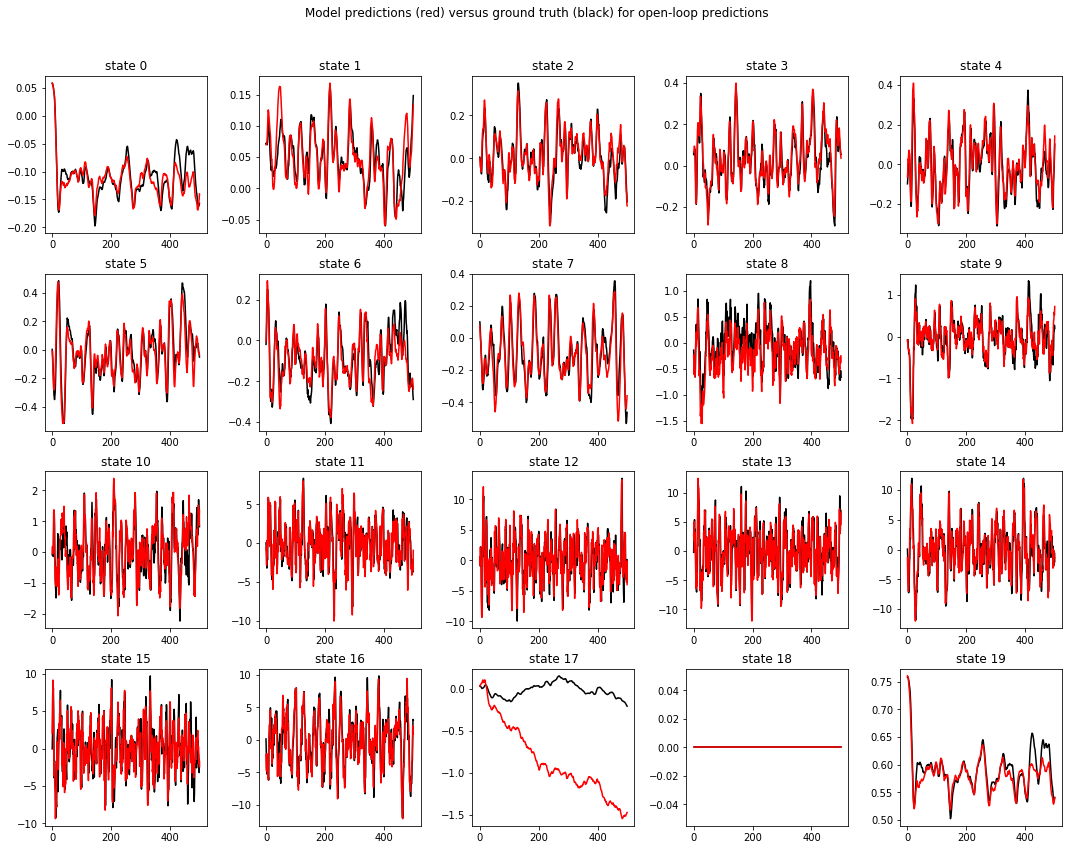

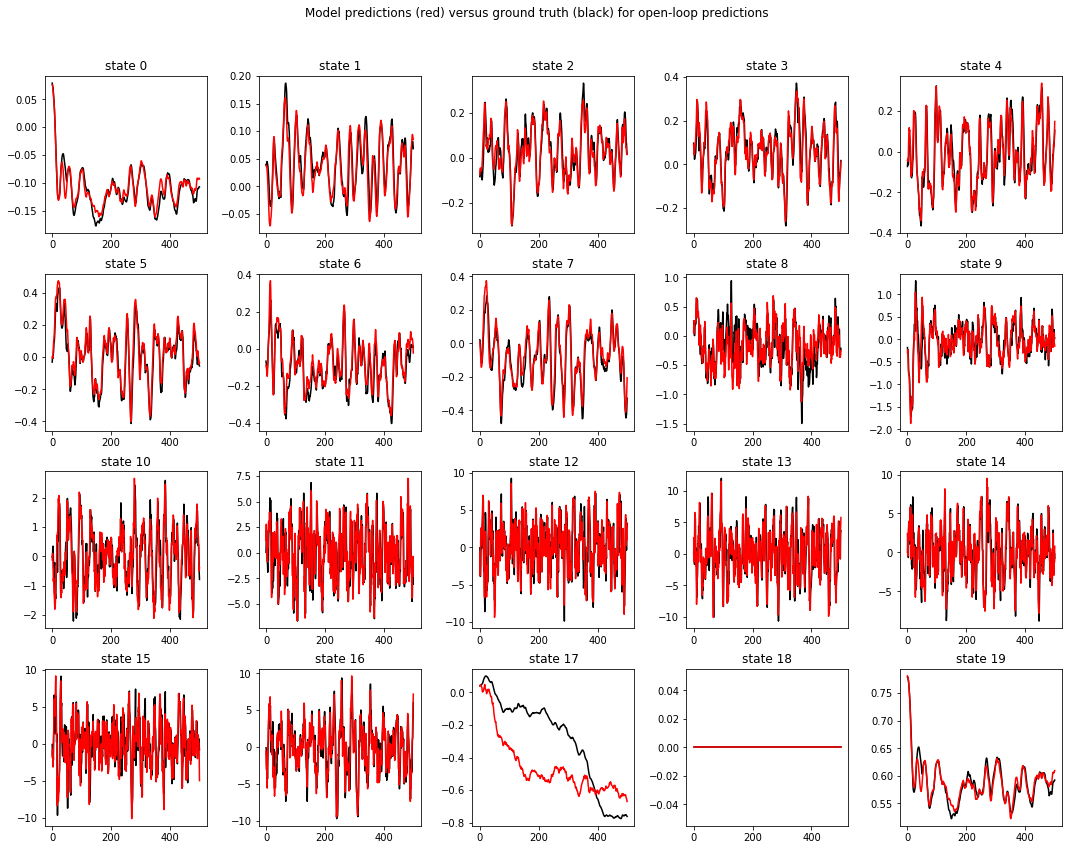

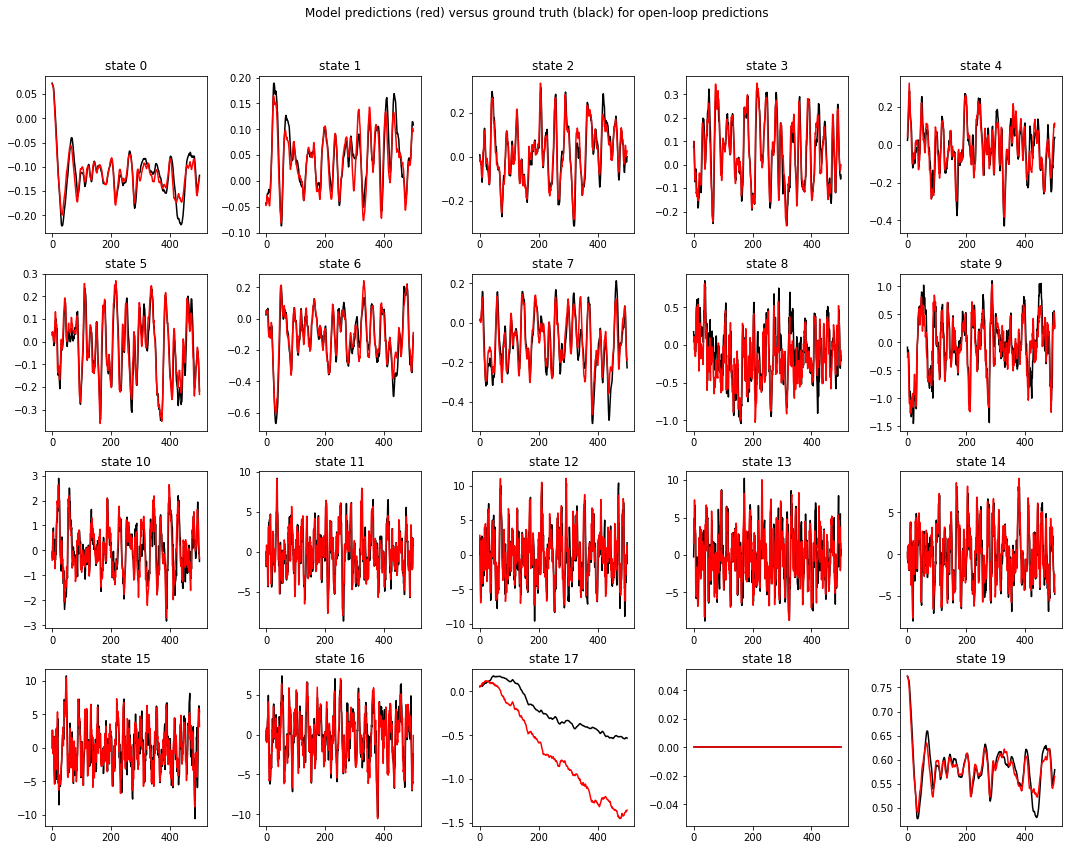

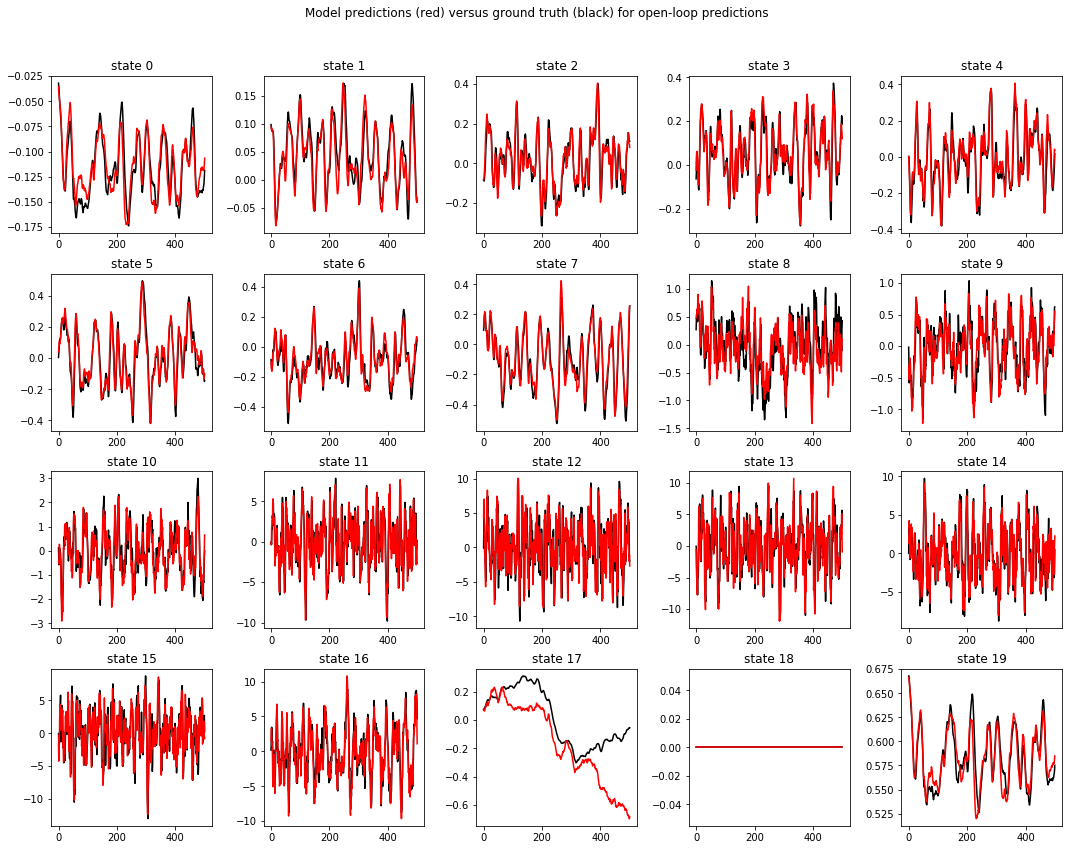

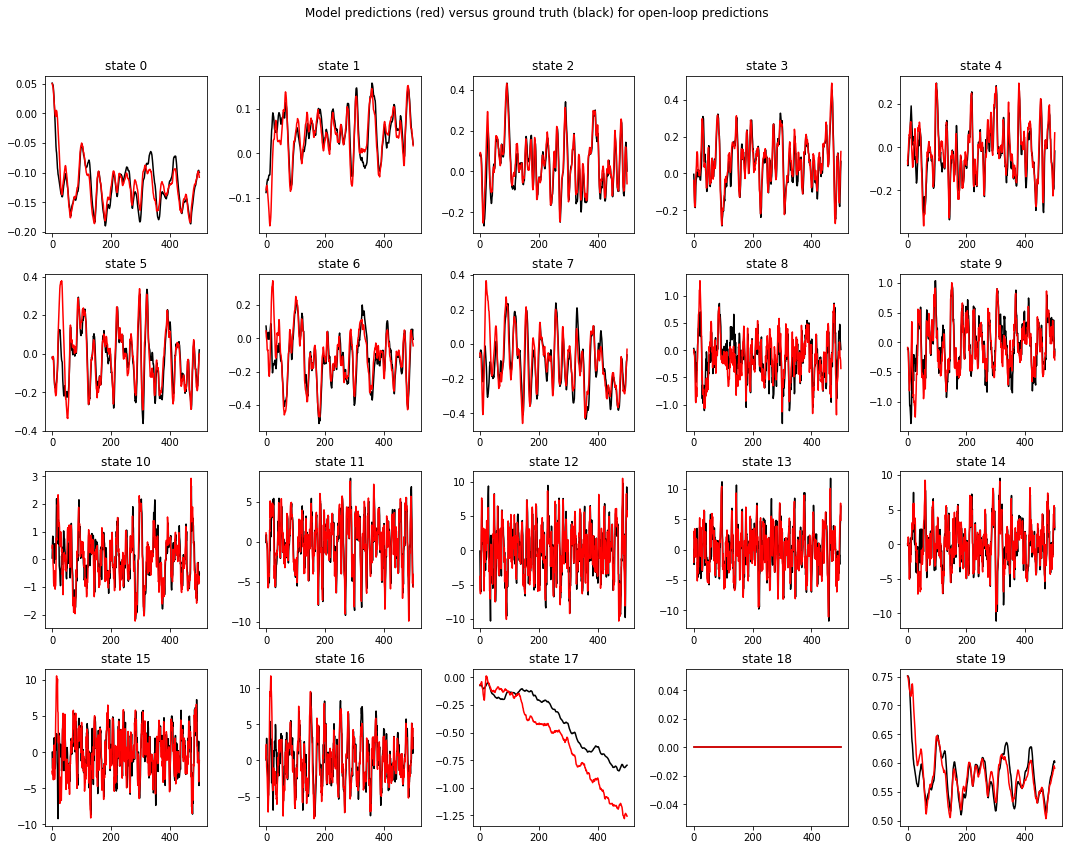

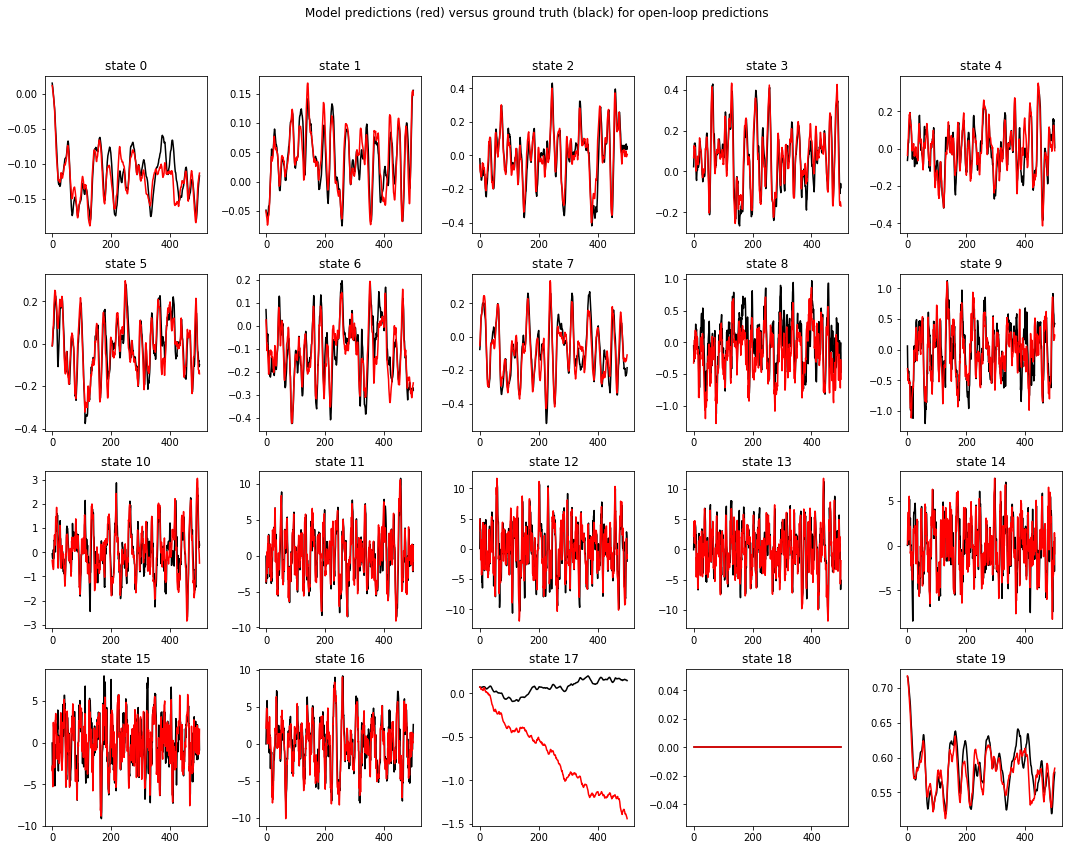

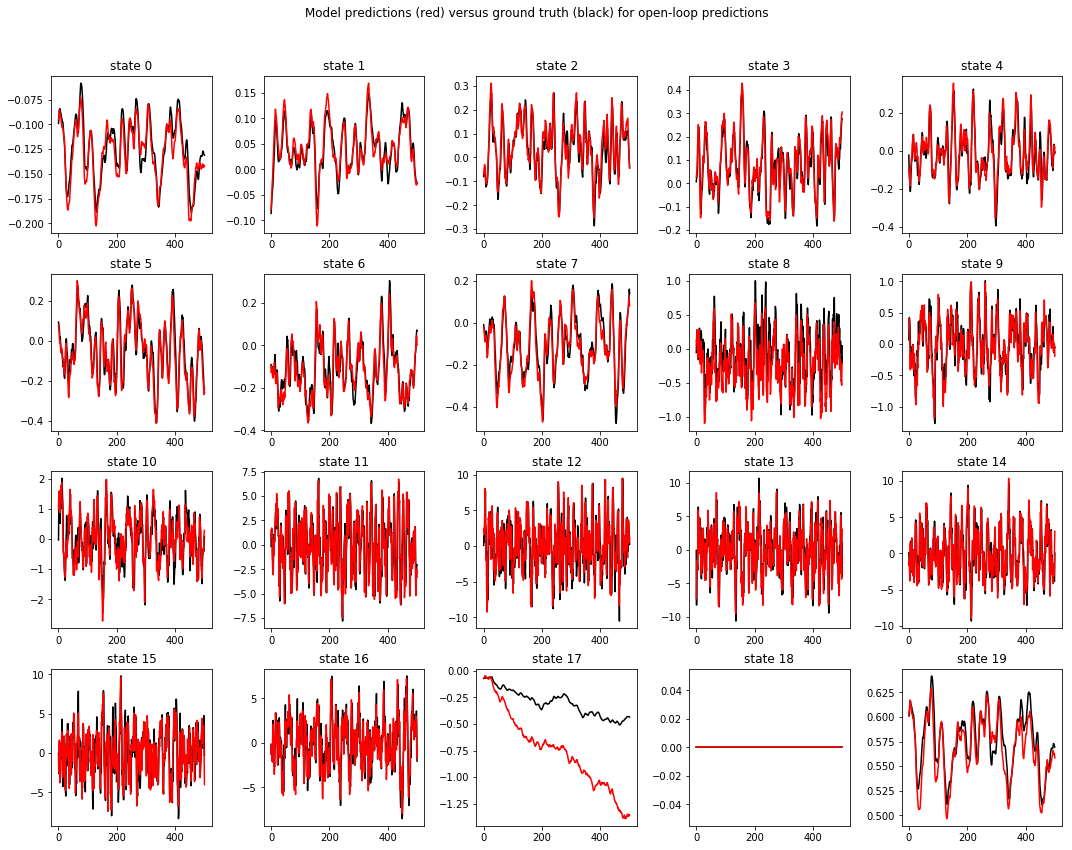

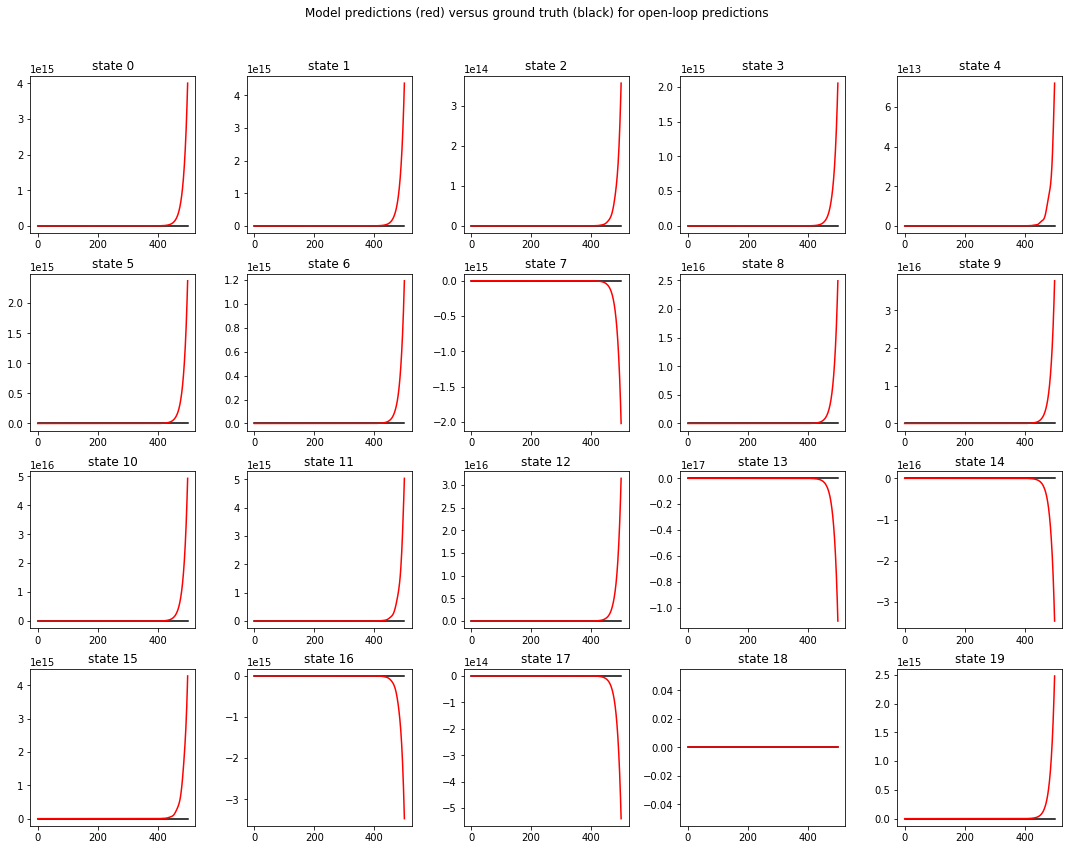

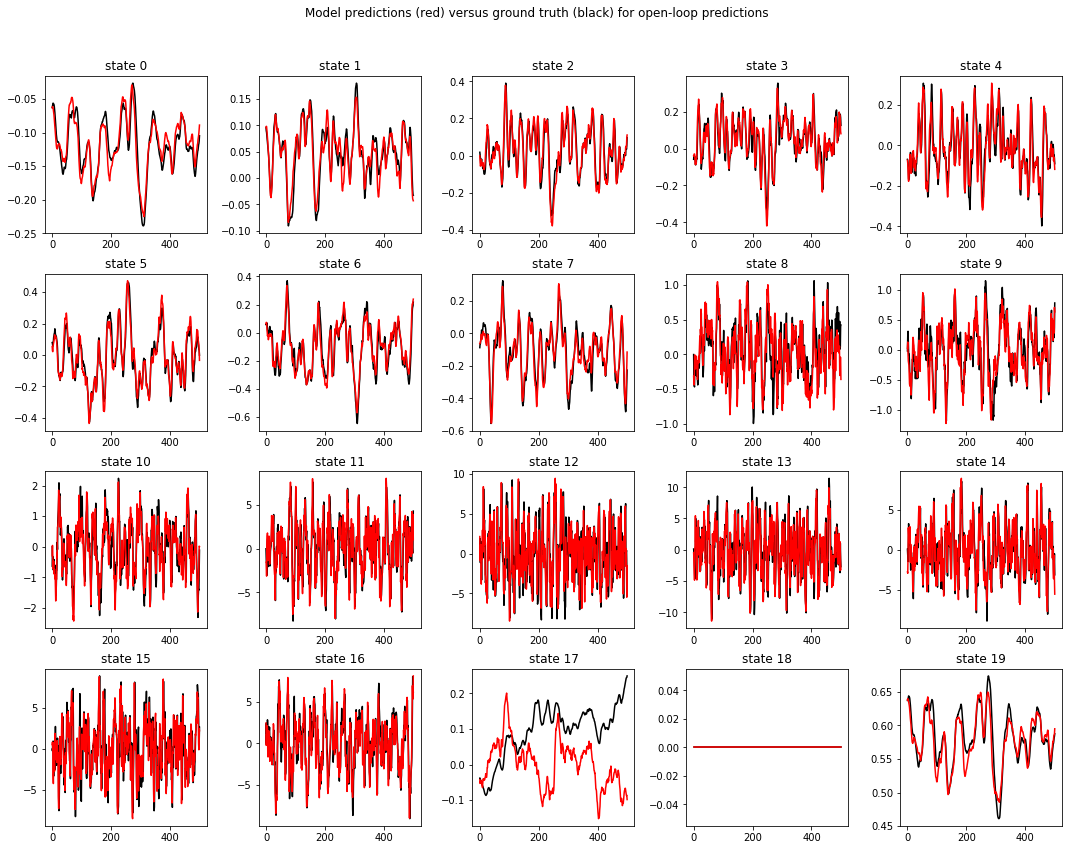

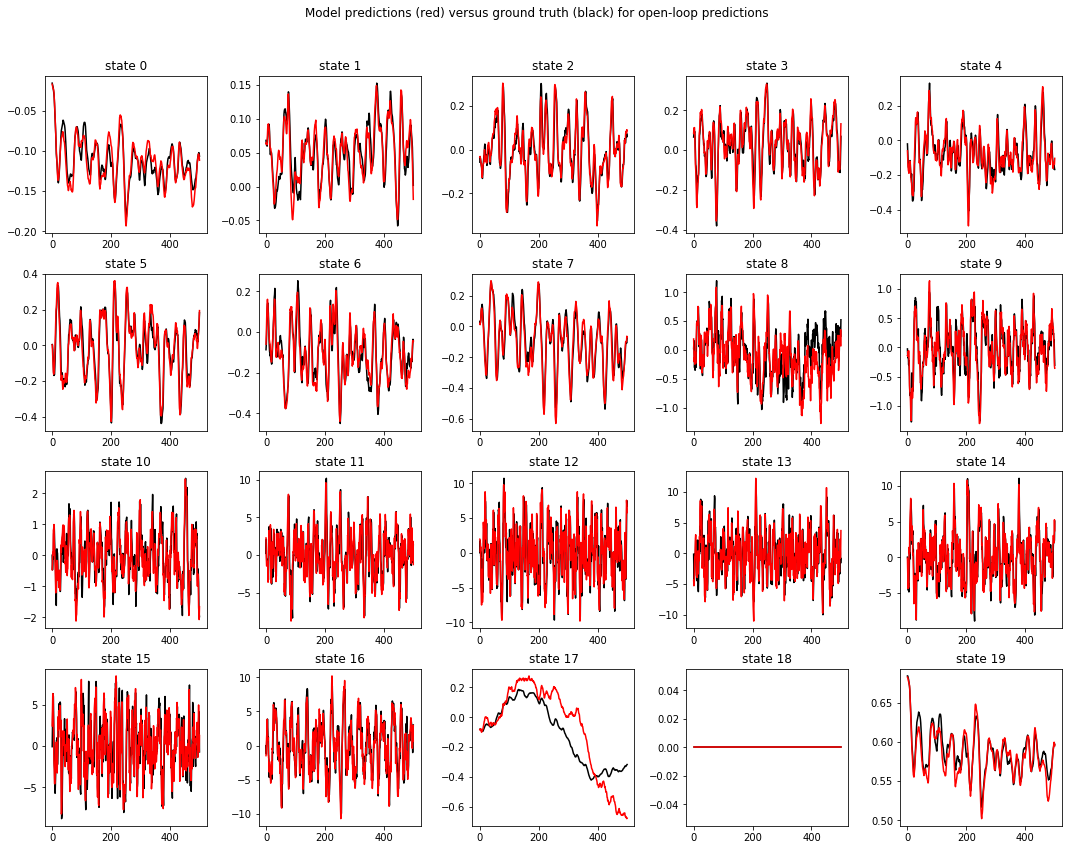

In [3]:
g = tf.Graph()
with tf.Session() as sess, g.as_default() :
    sys.argv = 'python main.py q1 --exp_name exp'.split()[1:]
    print('starts running at', dt.datetime.now())
    run_mbrl()
    print('finished running at', dt.datetime.now())



## Q2

* RandomPolicy should return ReturnAverage around -160
* Trained Policy should return ReturnAverage around 0


In [4]:
g = tf.Graph()
with tf.Session() as sess, g.as_default() :
    sys.argv = 'python main.py q2 --exp_name exp'.split()[1:]
    print('starts running at', dt.datetime.now())
    run_mbrl()
    print('finished running at', dt.datetime.now())



starts running at 2019-09-27 09:28:22.497293
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


09-27 09:28:22 HalfCheetah_q2_exp INFO     Gathering random dataset
I0927 09:28:22.519237 31764 logger.py:107] Gathering random dataset
09-27 09:28:22 HalfCheetah_q2_exp INFO     Creating policy
I0927 09:28:22.761588 31764 logger.py:107] Creating policy
09-27 09:28:23 HalfCheetah_q2_exp INFO     Random policy
I0927 09:28:23.072803 31764 logger.py:107] Random policy
09-27 09:28:23 HalfCheetah_q2_exp INFO     ---------  ---------
I0927 09:28:23.079780 31764 logger.py:107] ---------  ---------
09-27 09:28:23 HalfCheetah_q2_exp INFO     ReturnAvg  -149.554
I0927 09:28:23.084723 31764 logger.py:107] ReturnAvg  -149.554
09-27 09:28:23 HalfCheetah_q2_exp INFO     ReturnMax  -117.158
I0927 09:28:23.089709 31764 logger.py:107] ReturnMax  -117.158
09-27 09:28:23 HalfCheetah_q2_exp INFO     ReturnMin  -197.142
I0927 09:28:23.096692 31764 logger.py:107] ReturnMin  -197.142
09-27 09:28:23 HalfCheetah_q2_exp INFO     ReturnStd    25.8923
I0927 09:28:23.101676 31764 logger.py:107] ReturnStd    25.892

finished running at 2019-09-27 09:29:29.050766


## Q3a

* RandomPolicy should return ReturnAverage around -160
* Trained Policy should return ReturnAverage around 300 by the 10th iteration


In [5]:
g = tf.Graph()
with tf.Session() as sess, g.as_default() :
    sys.argv = 'python main.py q3 --exp_name default'.split()[1:]
    print('starts running at', dt.datetime.now())
    run_mbrl()
    print('finished running at', dt.datetime.now())



starts running at 2019-09-27 09:29:29.120576
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


09-27 09:29:29 HalfCheetah_q3_default INFO     Gathering random dataset
I0927 09:29:29.157477 31764 logger.py:107] Gathering random dataset
09-27 09:29:29 HalfCheetah_q3_default INFO     Creating policy
I0927 09:29:29.422791 31764 logger.py:107] Creating policy
09-27 09:29:29 HalfCheetah_q3_default INFO     Iteration -1
I0927 09:29:29.783806 31764 logger.py:107] Iteration -1
09-27 09:29:29 HalfCheetah_q3_default INFO     ---------  ---------
I0927 09:29:29.797721 31764 logger.py:107] ---------  ---------
09-27 09:29:29 HalfCheetah_q3_default INFO     Itr          -1
I0927 09:29:29.807746 31764 logger.py:107] Itr          -1
09-27 09:29:29 HalfCheetah_q3_default INFO     ReturnAvg  -149.469
I0927 09:29:29.817668 31764 logger.py:107] ReturnAvg  -149.469
09-27 09:29:29 HalfCheetah_q3_default INFO     ReturnMax   -91.9019
I0927 09:29:29.823650 31764 logger.py:107] ReturnMax   -91.9019
09-27 09:29:29 HalfCheetah_q3_default INFO     ReturnMin  -199.202
I0927 09:29:29.831631 31764 logger.py:1

finished running at 2019-09-27 09:43:53.933215


starts plot  ['main.py', 'q3', '--exp_name', 'default']  at 2019-09-27 09:43:53.972069
finished plot  ['main.py', 'q3', '--exp_name', 'default']  at 2019-09-27 09:43:54.052909


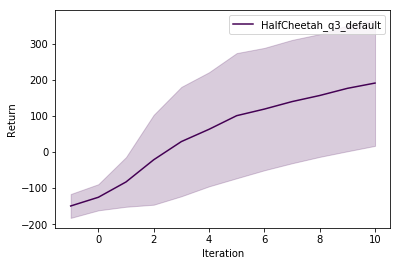

In [6]:
%matplotlib inline
print('starts plot ', sys.argv, ' at', dt.datetime.now())
%run plot.py --exps HalfCheetah_q3_default --save HalfCheetah_q3_default
print('finished plot ', sys.argv, ' at', dt.datetime.now())

## Q3b

In [7]:
cmd_list = [
    'python main.py q3 --exp_name action128 --num_random_action_selection 128',
    'python main.py q3 --exp_name action4096 --num_random_action_selection 4096',
    'python main.py q3 --exp_name action16384 --num_random_action_selection 16384',
    'python main.py q3 --exp_name horizon10 --mpc_horizon 10',
    'python main.py q3 --exp_name horizon15 --mpc_horizon 15',
    'python main.py q3 --exp_name horizon20 --mpc_horizon 20',
    'python main.py q3 --exp_name layers1 --nn_layers 1',
    'python main.py q3 --exp_name layers2 --nn_layers 2',
    'python main.py q3 --exp_name layers3 --nn_layers 3',    
    ]

for cmd in cmd_list :
    g = tf.Graph()
    with tf.Session() as sess, g.as_default() :
        sys.argv = cmd.split()[1:]
        print('starts running at', dt.datetime.now())
        run_mbrl()
        print('finished running at', dt.datetime.now())


starts running at 2019-09-27 09:43:54.243389
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


09-27 09:43:54 HalfCheetah_q3_action128 INFO     Gathering random dataset
I0927 09:43:54.276255 31764 logger.py:107] Gathering random dataset
09-27 09:43:54 HalfCheetah_q3_action128 INFO     Creating policy
I0927 09:43:54.552566 31764 logger.py:107] Creating policy
09-27 09:43:54 HalfCheetah_q3_action128 INFO     Iteration -1
I0927 09:43:54.907635 31764 logger.py:107] Iteration -1
09-27 09:43:54 HalfCheetah_q3_action128 INFO     ---------  ---------
I0927 09:43:54.923527 31764 logger.py:107] ---------  ---------
09-27 09:43:54 HalfCheetah_q3_action128 INFO     Itr          -1
I0927 09:43:54.933543 31764 logger.py:107] Itr          -1
09-27 09:43:54 HalfCheetah_q3_action128 INFO     ReturnAvg  -132.531
I0927 09:43:54.942476 31764 logger.py:107] ReturnAvg  -132.531
09-27 09:43:54 HalfCheetah_q3_action128 INFO     ReturnMax   -70.1452
I0927 09:43:54.949498 31764 logger.py:107] ReturnMax   -70.1452
09-27 09:43:54 HalfCheetah_q3_action128 INFO     ReturnMin  -189.698
I0927 09:43:54.956437 3

finished running at 2019-09-27 09:58:29.969045
starts running at 2019-09-27 09:58:30.056804
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


09-27 09:58:30 HalfCheetah_q3_action4096 INFO     Gathering random dataset
I0927 09:58:30.115604 31764 logger.py:107] Gathering random dataset
09-27 09:58:30 HalfCheetah_q3_action4096 INFO     Creating policy
I0927 09:58:30.348978 31764 logger.py:107] Creating policy
09-27 09:58:30 HalfCheetah_q3_action4096 INFO     Iteration -1
I0927 09:58:30.723021 31764 logger.py:107] Iteration -1
09-27 09:58:30 HalfCheetah_q3_action4096 INFO     ---------  ---------
I0927 09:58:30.736987 31764 logger.py:107] ---------  ---------
09-27 09:58:30 HalfCheetah_q3_action4096 INFO     Itr          -1
I0927 09:58:30.745915 31764 logger.py:107] Itr          -1
09-27 09:58:30 HalfCheetah_q3_action4096 INFO     ReturnAvg  -169.566
I0927 09:58:30.755892 31764 logger.py:107] ReturnAvg  -169.566
09-27 09:58:30 HalfCheetah_q3_action4096 INFO     ReturnMax  -131.843
I0927 09:58:30.764949 31764 logger.py:107] ReturnMax  -131.843
09-27 09:58:30 HalfCheetah_q3_action4096 INFO     ReturnMin  -198.433
I0927 09:58:30.77

finished running at 2019-09-27 10:13:26.976220
starts running at 2019-09-27 10:13:27.065921
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


09-27 10:13:27 HalfCheetah_q3_action16384 INFO     Gathering random dataset
I0927 10:13:27.117782 31764 logger.py:107] Gathering random dataset
09-27 10:13:27 HalfCheetah_q3_action16384 INFO     Creating policy
I0927 10:13:27.359180 31764 logger.py:107] Creating policy
09-27 10:13:27 HalfCheetah_q3_action16384 INFO     Iteration -1
I0927 10:13:27.712235 31764 logger.py:107] Iteration -1
09-27 10:13:27 HalfCheetah_q3_action16384 INFO     ---------  ---------
I0927 10:13:27.725159 31764 logger.py:107] ---------  ---------
09-27 10:13:27 HalfCheetah_q3_action16384 INFO     Itr          -1
I0927 10:13:27.735131 31764 logger.py:107] Itr          -1
09-27 10:13:27 HalfCheetah_q3_action16384 INFO     ReturnAvg  -147.995
I0927 10:13:27.744149 31764 logger.py:107] ReturnAvg  -147.995
09-27 10:13:27 HalfCheetah_q3_action16384 INFO     ReturnMax  -103.445
I0927 10:13:27.751088 31764 logger.py:107] ReturnMax  -103.445
09-27 10:13:27 HalfCheetah_q3_action16384 INFO     ReturnMin  -194.341
I0927 10:

finished running at 2019-09-27 10:30:44.793728
starts running at 2019-09-27 10:30:44.869524
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


09-27 10:30:44 HalfCheetah_q3_horizon10 INFO     Gathering random dataset
I0927 10:30:44.907423 31764 logger.py:107] Gathering random dataset
09-27 10:30:45 HalfCheetah_q3_horizon10 INFO     Creating policy
I0927 10:30:45.169721 31764 logger.py:107] Creating policy
09-27 10:30:45 HalfCheetah_q3_horizon10 INFO     Iteration -1
I0927 10:30:45.531800 31764 logger.py:107] Iteration -1
09-27 10:30:45 HalfCheetah_q3_horizon10 INFO     ---------  ---------
I0927 10:30:45.542767 31764 logger.py:107] ---------  ---------
09-27 10:30:45 HalfCheetah_q3_horizon10 INFO     Itr          -1
I0927 10:30:45.553739 31764 logger.py:107] Itr          -1
09-27 10:30:45 HalfCheetah_q3_horizon10 INFO     ReturnAvg  -151.225
I0927 10:30:45.564709 31764 logger.py:107] ReturnAvg  -151.225
09-27 10:30:45 HalfCheetah_q3_horizon10 INFO     ReturnMax  -110.144
I0927 10:30:45.572691 31764 logger.py:107] ReturnMax  -110.144
09-27 10:30:45 HalfCheetah_q3_horizon10 INFO     ReturnMin  -175.843
I0927 10:30:45.578670 317

finished running at 2019-09-27 10:42:48.345024
starts running at 2019-09-27 10:42:48.431789
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


09-27 10:42:48 HalfCheetah_q3_horizon15 INFO     Gathering random dataset
I0927 10:42:48.487596 31764 logger.py:107] Gathering random dataset
09-27 10:42:48 HalfCheetah_q3_horizon15 INFO     Creating policy
I0927 10:42:48.723010 31764 logger.py:107] Creating policy
09-27 10:42:49 HalfCheetah_q3_horizon15 INFO     Iteration -1
I0927 10:42:49.082048 31764 logger.py:107] Iteration -1
09-27 10:42:49 HalfCheetah_q3_horizon15 INFO     ---------  ---------
I0927 10:42:49.094971 31764 logger.py:107] ---------  ---------
09-27 10:42:49 HalfCheetah_q3_horizon15 INFO     Itr          -1
I0927 10:42:49.105984 31764 logger.py:107] Itr          -1
09-27 10:42:49 HalfCheetah_q3_horizon15 INFO     ReturnAvg  -147.741
I0927 10:42:49.116914 31764 logger.py:107] ReturnAvg  -147.741
09-27 10:42:49 HalfCheetah_q3_horizon15 INFO     ReturnMax   -99.668
I0927 10:42:49.123897 31764 logger.py:107] ReturnMax   -99.668
09-27 10:42:49 HalfCheetah_q3_horizon15 INFO     ReturnMin  -194.3
I0927 10:42:49.129880 31764

finished running at 2019-09-27 10:57:42.134813
starts running at 2019-09-27 10:57:42.223512
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


09-27 10:57:42 HalfCheetah_q3_horizon20 INFO     Gathering random dataset
I0927 10:57:42.280401 31764 logger.py:107] Gathering random dataset
09-27 10:57:42 HalfCheetah_q3_horizon20 INFO     Creating policy
I0927 10:57:42.544693 31764 logger.py:107] Creating policy
09-27 10:57:43 HalfCheetah_q3_horizon20 INFO     Iteration -1
I0927 10:57:43.013438 31764 logger.py:107] Iteration -1
09-27 10:57:43 HalfCheetah_q3_horizon20 INFO     ---------  --------
I0927 10:57:43.026363 31764 logger.py:107] ---------  --------
09-27 10:57:43 HalfCheetah_q3_horizon20 INFO     Itr          -1
I0927 10:57:43.036337 31764 logger.py:107] Itr          -1
09-27 10:57:43 HalfCheetah_q3_horizon20 INFO     ReturnAvg  -132.452
I0927 10:57:43.046313 31764 logger.py:107] ReturnAvg  -132.452
09-27 10:57:43 HalfCheetah_q3_horizon20 INFO     ReturnMax  -103.147
I0927 10:57:43.057321 31764 logger.py:107] ReturnMax  -103.147
09-27 10:57:43 HalfCheetah_q3_horizon20 INFO     ReturnMin  -170.812
I0927 10:57:43.064306 31764

finished running at 2019-09-27 11:14:54.168861
starts running at 2019-09-27 11:14:54.263554
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


09-27 11:14:54 HalfCheetah_q3_layers1 INFO     Gathering random dataset
I0927 11:14:54.326385 31764 logger.py:107] Gathering random dataset
09-27 11:14:54 HalfCheetah_q3_layers1 INFO     Creating policy
I0927 11:14:54.563796 31764 logger.py:107] Creating policy
09-27 11:14:54 HalfCheetah_q3_layers1 INFO     Iteration -1
I0927 11:14:54.924831 31764 logger.py:107] Iteration -1
09-27 11:14:54 HalfCheetah_q3_layers1 INFO     ---------  ---------
I0927 11:14:54.937797 31764 logger.py:107] ---------  ---------
09-27 11:14:54 HalfCheetah_q3_layers1 INFO     Itr          -1
I0927 11:14:54.948722 31764 logger.py:107] Itr          -1
09-27 11:14:54 HalfCheetah_q3_layers1 INFO     ReturnAvg  -166.629
I0927 11:14:54.957698 31764 logger.py:107] ReturnAvg  -166.629
09-27 11:14:54 HalfCheetah_q3_layers1 INFO     ReturnMax  -118.381
I0927 11:14:54.966673 31764 logger.py:107] ReturnMax  -118.381
09-27 11:14:54 HalfCheetah_q3_layers1 INFO     ReturnMin  -251.551
I0927 11:14:54.972657 31764 logger.py:107

finished running at 2019-09-27 11:30:00.873742
starts running at 2019-09-27 11:30:00.956522
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


09-27 11:30:01 HalfCheetah_q3_layers2 INFO     Gathering random dataset
I0927 11:30:01.016375 31764 logger.py:107] Gathering random dataset
09-27 11:30:01 HalfCheetah_q3_layers2 INFO     Creating policy
I0927 11:30:01.247740 31764 logger.py:107] Creating policy
09-27 11:30:01 HalfCheetah_q3_layers2 INFO     Iteration -1
I0927 11:30:01.715252 31764 logger.py:107] Iteration -1
09-27 11:30:01 HalfCheetah_q3_layers2 INFO     ---------  ---------
I0927 11:30:01.727226 31764 logger.py:107] ---------  ---------
09-27 11:30:01 HalfCheetah_q3_layers2 INFO     Itr          -1
I0927 11:30:01.737191 31764 logger.py:107] Itr          -1
09-27 11:30:01 HalfCheetah_q3_layers2 INFO     ReturnAvg  -159.955
I0927 11:30:01.747164 31764 logger.py:107] ReturnAvg  -159.955
09-27 11:30:01 HalfCheetah_q3_layers2 INFO     ReturnMax  -118.099
I0927 11:30:01.754148 31764 logger.py:107] ReturnMax  -118.099
09-27 11:30:01 HalfCheetah_q3_layers2 INFO     ReturnMin  -219.903
I0927 11:30:01.762081 31764 logger.py:107

finished running at 2019-09-27 11:45:07.805387
starts running at 2019-09-27 11:45:07.893199
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


09-27 11:45:07 HalfCheetah_q3_layers3 INFO     Gathering random dataset
I0927 11:45:07.954755 31764 logger.py:107] Gathering random dataset
09-27 11:45:08 HalfCheetah_q3_layers3 INFO     Creating policy
I0927 11:45:08.192165 31764 logger.py:107] Creating policy
09-27 11:45:08 HalfCheetah_q3_layers3 INFO     Iteration -1
I0927 11:45:08.550212 31764 logger.py:107] Iteration -1
09-27 11:45:08 HalfCheetah_q3_layers3 INFO     ---------  ---------
I0927 11:45:08.565123 31764 logger.py:107] ---------  ---------
09-27 11:45:08 HalfCheetah_q3_layers3 INFO     Itr          -1
I0927 11:45:08.576092 31764 logger.py:107] Itr          -1
09-27 11:45:08 HalfCheetah_q3_layers3 INFO     ReturnAvg  -168.231
I0927 11:45:08.584071 31764 logger.py:107] ReturnAvg  -168.231
09-27 11:45:08 HalfCheetah_q3_layers3 INFO     ReturnMax  -100.678
I0927 11:45:08.592049 31764 logger.py:107] ReturnMax  -100.678
09-27 11:45:08 HalfCheetah_q3_layers3 INFO     ReturnMin  -211.999
I0927 11:45:08.601024 31764 logger.py:107

finished running at 2019-09-27 12:00:14.497172


starts plot at 2019-09-27 13:18:15.599803
finished plot at 2019-09-27 13:18:15.913963


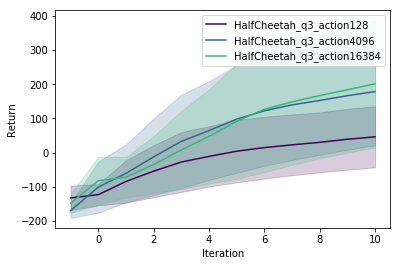

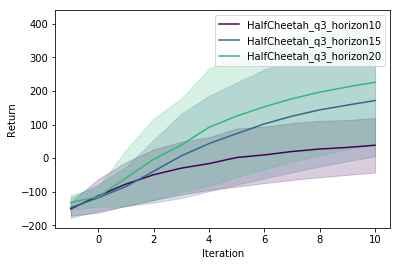

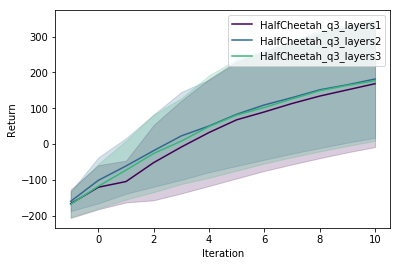

In [11]:
import datetime as dt
import sys

%matplotlib inline

print('starts plot at', dt.datetime.now())

%run plot.py --exps HalfCheetah_q3_action128 HalfCheetah_q3_action4096 HalfCheetah_q3_action16384 --save HalfCheetah_q3_actions

%run plot.py --exps HalfCheetah_q3_horizon10 HalfCheetah_q3_horizon15 HalfCheetah_q3_horizon20 --save HalfCheetah_q3_mpc_horizon

%run plot.py --exps HalfCheetah_q3_layers1 HalfCheetah_q3_layers2 HalfCheetah_q3_layers3 --save HalfCheetah_q3_nn_layers

import plot # will load plot.py

print('finished plot at', dt.datetime.now())